In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy import genfromtxt
import os
import cv2

In [3]:
def show(img):
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

In [13]:
def crop_image(input_path, output_path):
    image = cv2.imread(input_path, 0)
    color_image = cv2.imread(input_path)
    
    # thresholding
    image[image < 255] = 0
    image = 255-image

    im2,contours,hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    kernel = np.ones((3, 3),np.uint8)
    
    im2 = cv2.erode(im2,kernel,iterations = 3)
    im2 = cv2.dilate(im2,kernel,iterations = 3)
    
    if len(contours) != 0:
        c = max(contours, key = cv2.contourArea)
        x,y,w,h = cv2.boundingRect(c)
        
        color_image[:y, :] = [255, 255, 255]
        color_image[y+h:, :] = [255, 255, 255]
        color_image[:, :x] = [255, 255, 255]
        color_image[:, x+w:] = [255, 255, 255]
        

        color_image[im2 == 0] = [255, 255, 255]

        x = x + w//2 - 200
        y = y + h//2 - 200
        w = h = 400
        
        
        cv2.imwrite(output_path, color_image[y:y+h, x:x+w])

(1047, 1920)


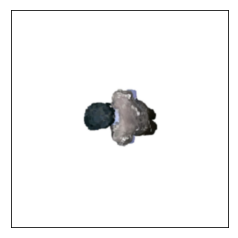

In [12]:
for angle in range(1, 5):
    for i in range(10, 50001, 10):
        input_path = f"rgb_big/{i:08}_{angle}.png"
        output_path = f"rgb/{i:08}_{angle}.png"
                
        if os.path.exists(input_path):
            crop_image(input_path, output_path)

In [12]:
def add_texture(input_path, output_path):
    image = cv2.imread(input_path)
    texture = cv2.imread("./texture.jpg")
    texture = cv2.resize(texture, (400, 400), interpolation = cv2.INTER_AREA)
    
    
    image[image == 255] = texture[image == 255]
    cv2.imwrite(output_path, image)

In [13]:
for angle in range(1, 5):
    for i in range(10, 30000, 10):
        input_path = f"rgb/{i:08}_{angle}.png"
        output_path = f"CROP_IMG_TEXTURE/{i:08}_{angle}.png"
                
        if os.path.exists(input_path):
            add_texture(input_path, output_path)
